## 1 - Importing Libraries

In [106]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn.metrics import precision_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
import pickle

## 2 - Loading Data

In [5]:
tsla = yf.Ticker('TSLA')
tsla = tsla.history(period='max')

In [7]:
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-18 00:00:00-04:00,252.699997,254.630005,242.080002,242.679993,125147800,0.0,0.0
2023-10-19 00:00:00-04:00,225.949997,230.610001,216.779999,220.110001,170772700,0.0,0.0
2023-10-20 00:00:00-04:00,217.009995,218.860001,210.419998,211.990005,137734000,0.0,0.0


In [8]:
tsla.index = tsla.index.date

In [9]:
tsla.index = pd.to_datetime(tsla.index)

In [10]:
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-18,252.699997,254.630005,242.080002,242.679993,125147800,0.0,0.0
2023-10-19,225.949997,230.610001,216.779999,220.110001,170772700,0.0,0.0
2023-10-20,217.009995,218.860001,210.419998,211.990005,137734000,0.0,0.0
2023-10-23,210.000000,216.979996,202.509995,212.080002,150683400,0.0,0.0


## 3 - Data  Visualization

C:\Users\s_bou\AppData\Local\Temp\ipykernel_20340\3949891566.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\s_bou\AppData\Local\Temp\ipykernel_20340\3949891566.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(tsla.index, tsla.Close, marker = None,linestyle='solid')


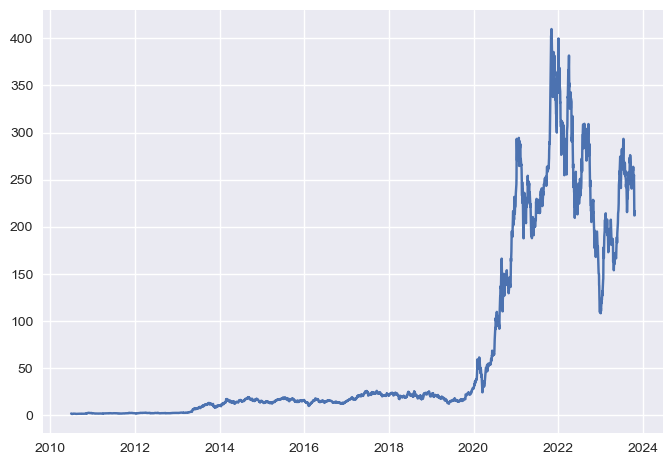

In [11]:
plt.style.use('seaborn')
plt.plot_date(tsla.index, tsla.Close, marker = None,linestyle='solid')

## 4 - Preparing Data

In [12]:
del tsla['Dividends']
del tsla['Stock Splits']

In [13]:
tsla

,Open,High,Low,Close,Volume
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2023-10-18,252.699997,254.630005,242.080002,242.679993,125147800
2023-10-19,225.949997,230.610001,216.779999,220.110001,170772700
2023-10-20,217.009995,218.860001,210.419998,211.990005,137734000
2023-10-23,210.000000,216.979996,202.509995,212.080002,150683400


In [14]:
data = tsla[['Close']]
data = data.rename(columns = {'Close':'Actual_Close'})

In [15]:
data

,Actual_Close
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-10-18,242.679993
2023-10-19,220.110001
2023-10-20,211.990005
2023-10-23,212.080002


In [16]:
# Target is gonna be like the prediction, if the price goes up in the next day then Target wil be 1 else 0
data['Target'] = tsla.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [17]:
data

,Actual_Close,Target
2010-06-29,1.592667,NaN
2010-06-30,1.588667,0.0
2010-07-01,1.464000,0.0
2010-07-02,1.280000,0.0
2010-07-06,1.074000,0.0
...,...,...
2023-10-18,242.679993,0.0
2023-10-19,220.110001,0.0
2023-10-20,211.990005,0.0
2023-10-23,212.080002,1.0


In [18]:
tsla_prev = tsla.copy()
tsla_prev = tsla_prev.shift(1)

In [19]:
display(tsla_prev)

,Open,High,Low,Close,Volume
2010-06-29,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.266667,1.666667,1.169333,1.592667,281494500.0
2010-07-01,1.719333,2.028000,1.553333,1.588667,257806500.0
2010-07-02,1.666667,1.728000,1.351333,1.464000,123282000.0
2010-07-06,1.533333,1.540000,1.247333,1.280000,77097000.0
...,...,...,...,...,...
2023-10-18,250.100006,257.179993,247.080002,254.850006,93562900.0
2023-10-19,252.699997,254.630005,242.080002,242.679993,125147800.0
2023-10-20,225.949997,230.610001,216.779999,220.110001,170772700.0
2023-10-23,217.009995,218.860001,210.419998,211.990005,137734000.0


In [20]:
predictors = ['Close','High','Low','Open','Volume']
# Get all the data except the first row
data = data.join(tsla_prev[predictors]).iloc[1:]

In [21]:
data.rename(columns={'Close':'Yesterday_Close'})

,Actual_Close,Target,Yesterday_Close,High,Low,Open,Volume
2010-06-30,1.588667,0.0,1.592667,1.666667,1.169333,1.266667,281494500.0
2010-07-01,1.464000,0.0,1.588667,2.028000,1.553333,1.719333,257806500.0
2010-07-02,1.280000,0.0,1.464000,1.728000,1.351333,1.666667,123282000.0
2010-07-06,1.074000,0.0,1.280000,1.540000,1.247333,1.533333,77097000.0
2010-07-07,1.053333,0.0,1.074000,1.333333,1.055333,1.333333,103003500.0
...,...,...,...,...,...,...,...
2023-10-18,242.679993,0.0,254.850006,257.179993,247.080002,250.100006,93562900.0
2023-10-19,220.110001,0.0,242.679993,254.630005,242.080002,252.699997,125147800.0
2023-10-20,211.990005,0.0,220.110001,230.610001,216.779999,225.949997,170772700.0
2023-10-23,212.080002,1.0,211.990005,218.860001,210.419998,217.009995,137734000.0


In [22]:
data.describe()

,Actual_Close,Target,Close,High,Low,Open,Volume
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3.353000e+03
mean,68.245374,0.517149,68.181274,69.716799,66.566910,68.199012,9.648806e+07
std,100.318377,0.499780,100.292268,102.634101,97.880065,100.369583,8.052965e+07
min,1.053333,0.000000,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,10.162667,0.000000,10.094000,10.476667,9.910667,10.160000,4.547310e+07
50%,16.795334,1.000000,16.790667,17.033333,16.554667,16.799999,8.031150e+07
75%,66.930664,1.000000,66.785332,67.731331,66.001335,66.663330,1.232010e+08
max,409.970001,1.000000,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [23]:
data.isnull().sum()

Actual_Close    0
Target          0
Close           0
High            0
Low             0
Open            0
Volume          0
dtype: int64

## 5 - Spliting Data

In [24]:
# for trainging we gonna take all the data except teh last 100 rows
train = data.iloc[:-100]
test = data.iloc[-100:]

## 6 - Training a Machine Learning Models

### A) - RandomForestClassifier

In [25]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=200,random_state=1)

In [47]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, n_estimators=300, random_state=1)

### B) - KNN Model

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [42]:
knn_model.fit(train[predictors], train['Target'])

KNeighborsClassifier(n_neighbors=10)

### C) QDA

In [91]:
qda_model = QuadraticDiscriminantAnalysis()

In [92]:
qda_model.fit(train[predictors], train['Target'])

QuadraticDiscriminantAnalysis()

## 7 - Validating Models

### A) - RandomForestClassifier

In [48]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [49]:
precision_score(test['Target'], preds)

0.5151515151515151

In [29]:
combined = pd.concat({'Target':test['Target'], 'Predictions':preds}, axis=1)

In [30]:
combined

,Target,Predictions
2023-06-02,1.0,1.0
2023-06-05,1.0,1.0
2023-06-06,1.0,1.0
2023-06-07,1.0,1.0
2023-06-08,1.0,1.0
...,...,...
2023-10-18,0.0,1.0
2023-10-19,0.0,1.0
2023-10-20,0.0,1.0
2023-10-23,1.0,1.0


<Axes: >

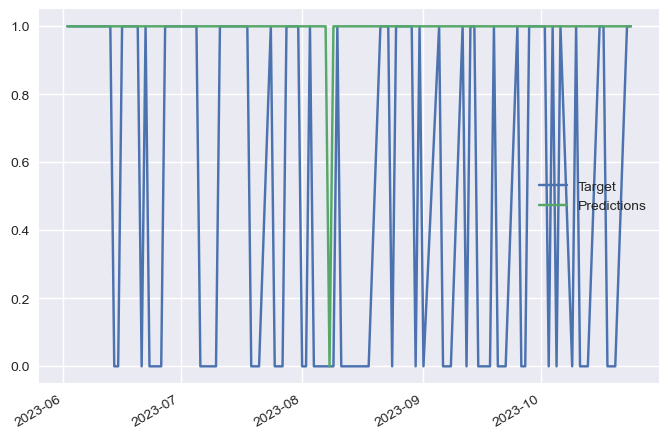

In [31]:
combined.plot()

### B) - KNN Model

In [44]:
preds_knn = knn_model.predict(test[predictors])
preds_knn = pd.Series(preds_knn, index=test.index)

In [50]:
precision_score(test['Target'], preds_knn)

0.6451612903225806

In [51]:
combined_knn = pd.concat({'Target':test['Target'], 'Predictions':preds_knn}, axis=1)

In [52]:
combined_knn

,Target,Predictions
2023-06-02,1.0,0.0
2023-06-05,1.0,0.0
2023-06-06,1.0,0.0
2023-06-07,1.0,0.0
2023-06-08,1.0,0.0
...,...,...
2023-10-18,0.0,0.0
2023-10-19,0.0,0.0
2023-10-20,0.0,1.0
2023-10-23,1.0,0.0


<Axes: >

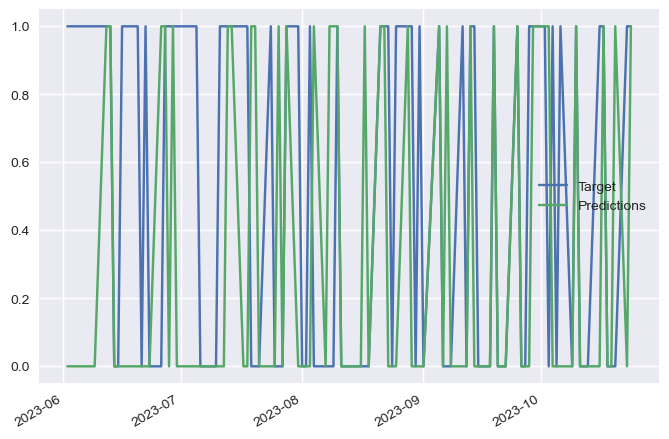

In [53]:
combined_knn.plot()

### C) QDA

In [93]:
preds_qda = qda_model.predict(test[predictors])
preds_qda = pd.Series(preds_qda, index=test.index)

In [94]:
precision_score(test['Target'], preds_qda)

0.5588235294117647

In [95]:
combined_qda = pd.concat({'Target':test['Target'], 'Predictions':preds_qda}, axis=1)

In [96]:
combined_qda

,Target,Predictions
2023-06-02,1.0,0.0
2023-06-05,1.0,1.0
2023-06-06,1.0,1.0
2023-06-07,1.0,0.0
2023-06-08,1.0,0.0
...,...,...
2023-10-18,0.0,1.0
2023-10-19,0.0,1.0
2023-10-20,0.0,1.0
2023-10-23,1.0,0.0


## 8 - Creating a Backtesting Engine

In [54]:
start = 1000
# in real world we should set the step to like 100 or something
step = 100
# so we gonna start tarining model from 0 to 1000, then we gonna
# make predictions from row 1000 to row 1750

def backtest(data, model, predictors, start = 1000, step=100):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train['Target'])

        preds = model.predict_proba(test[predictors])[:,1]

        preds = pd.Series(preds, index=test.index)

        preds[preds >.6] = 1
        preds[preds <=.6] = 0
        combined = pd.concat({'Target':test['Target'],'Predictions':preds}, axis=1)
        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions

### A) - RandomForestClassifier

In [61]:
predictions = backtest(data.iloc[365:], model, predictors)

In [62]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5405405405405406

### B) - KNN Model

In [59]:
predictions_knn = backtest(data.iloc[365:], knn_model, predictors)

In [60]:
precision_score(predictions_knn['Target'], predictions_knn['Predictions'])

0.5616113744075829

### C) QDA

In [97]:
predictions_qda = backtest(data.iloc[365:], qda_model, predictors)

In [98]:
precision_score(predictions_qda['Target'], predictions_qda['Predictions'])

0.5217391304347826

## 9 - Adding More Predictors

In [63]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(7).mean(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()['Target']

In [64]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [65]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]

### A) - RandomForestClassifier

In [66]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [67]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5503355704697986

In [110]:
predictions['Predictions'].value_counts()

0.0    1839
1.0     149
Name: Predictions, dtype: int64

### B) - KNN Model

In [68]:
predictions_knn = backtest(data.iloc[365:], knn_model, full_predictors)

In [69]:
precision_score(predictions_knn['Target'], predictions_knn['Predictions'])

0.5616113744075829

In [103]:
predictions_knn['Predictions'].value_counts()

0.0    1566
1.0     422
Name: Predictions, dtype: int64

### C) QDA

In [99]:
predictions_qda = backtest(data.iloc[365:], qda_model, full_predictors)

In [100]:
precision_score(predictions_qda['Target'], predictions_qda['Predictions'])

0.5142857142857142

In [102]:
predictions_qda['Predictions'].value_counts()

0.0    1358
1.0     630
Name: Predictions, dtype: int64

## 10 - Models Performance

In [78]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

In [80]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

### A) - RandomForestClassifier

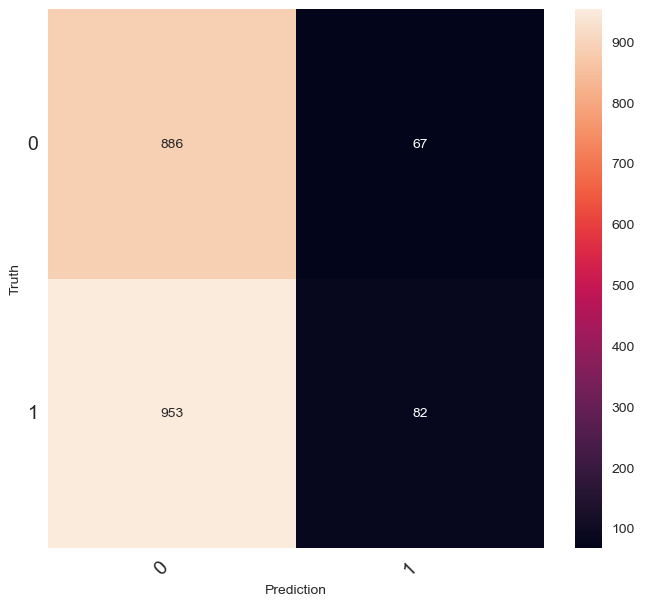

In [87]:
cm = confusion_matrix(predictions['Target'],predictions['Predictions'])
print_confusion_matrix(cm, ["0", "1"])

### B) - KNN Model

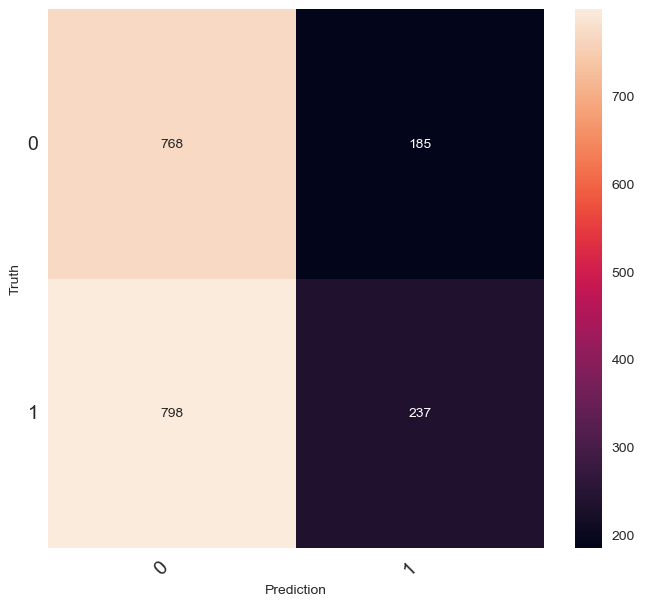

In [88]:
cm = confusion_matrix(predictions_knn['Target'],predictions_knn['Predictions'])
print_confusion_matrix(cm, ["0", "1"])

### C) QDA

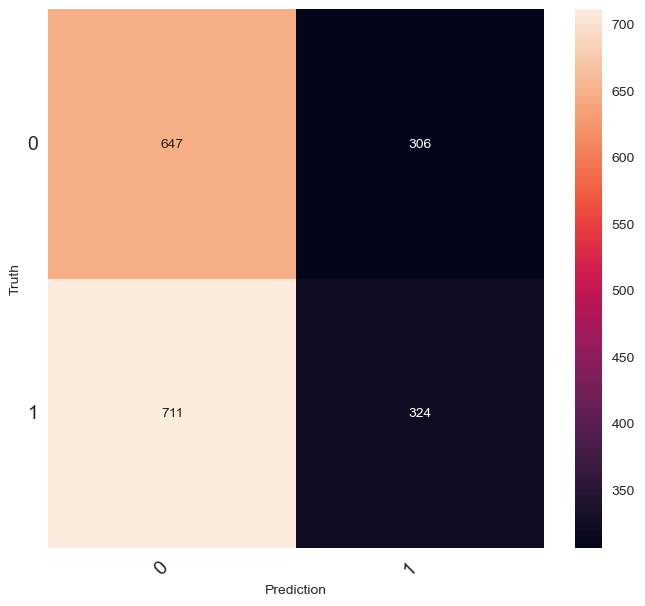

In [104]:
cm = confusion_matrix(predictions_qda['Target'],predictions_qda['Predictions'])
print_confusion_matrix(cm, ["0", "1"])

## 12) - Saving Models

In [107]:
pickle.dump(model, open('model_Forest.pkl', 'wb'))

In [108]:
pickle.dump(qda_model, open('model_Qda.pkl', 'wb'))

In [109]:
pickle.dump(knn_model, open('model_Knn.pkl', 'wb'))

## 13) - Results

In [113]:
print(f"Precision score for Random Forest Classifier {round(precision_score(predictions['Target'], predictions['Predictions']),2)}")

Precision score for Random Forest Classifier 0.55


In [114]:
print(f"Precision score for KNN Calssifier {round(precision_score(predictions_knn['Target'], predictions_knn['Predictions']),2)}")

Precision score for KNN Calssifier 0.56


In [115]:
print(f"Precision score for QDA Classifier {round(precision_score(predictions_qda['Target'], predictions_qda['Predictions']),2)}")

Precision score for QDA Classifier 0.51


We can see that Random Forest Classifier and KNN Calssifier perform the best.